In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mypath = "/content/drive/MyDrive/Kaggle/dataset/data/train/angry/Training_3908.jpg"
img_array = cv2.imread(mypath)

In [ ]:
img_array.shape

(48, 48, 3)

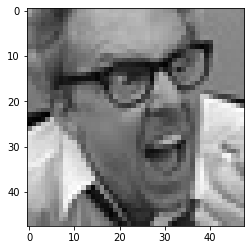

In [ ]:
plt.imshow(img_array)

In [ ]:
DATADIR = "/content/drive/MyDrive/Kaggle/dataset/data/train"

In [ ]:
MOODS = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

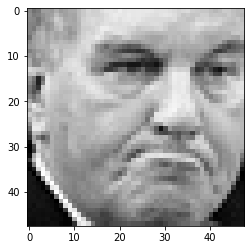

In [ ]:
for category in MOODS:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break    

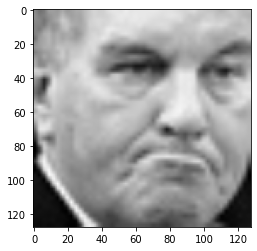

In [ ]:
IMG_SIZE = 128
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape

(128, 128, 3)

In [ ]:
training_data = []

def create_training_data():
    for category in MOODS:
        path = os.path.join(DATADIR, category)
        class_num = MOODS.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()            

In [ ]:
print(len(training_data))

28709


In [ ]:
import random

random.shuffle(training_data)

for sample in training_data[:6]:
    print(sample[1])

5
5
6
6
0
3


In [ ]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 128)      

In [ ]:
train_dir = '/content/drive/MyDrive/Kaggle/dataset/data/train'
val_dir = '/content/drive/MyDrive/Kaggle/dataset/data/test'

num_train = 28709
num_val = 7178
batch_size = 32
num_epoch = 50

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
   
)

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(128,128),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        val_dir,
        target_size=(128,128),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size
)



Epoch 1/50
897/897 [==============================] - 5097s 6s/step - loss: 1.8281 - accuracy: 0.2418 - val_loss: 1.7828 - val_accuracy: 0.2565
Epoch 2/50
897/897 [==============================] - 74s 82ms/step - loss: 1.6869 - accuracy: 0.3185 - val_loss: 1.4967 - val_accuracy: 0.4153
Epoch 3/50
897/897 [==============================] - 74s 82ms/step - loss: 1.4571 - accuracy: 0.4348 - val_loss: 1.3618 - val_accuracy: 0.4851
Epoch 4/50
897/897 [==============================] - 82s 92ms/step - loss: 1.3238 - accuracy: 0.4918 - val_loss: 1.2757 - val_accuracy: 0.5123
Epoch 5/50
897/897 [==============================] - 83s 92ms/step - loss: 1.2262 - accuracy: 0.5316 - val_loss: 1.1898 - val_accuracy: 0.5400
Epoch 6/50
897/897 [==============================] - 73s 82ms/step - loss: 1.1418 - accuracy: 0.5707 - val_loss: 1.1484 - val_accuracy: 0.5674
Epoch 7/50
897/897 [==============================] - 82s 91ms/step - loss: 1.0580 - accuracy: 0.6036 - val_loss: 1.1108 - val_accuracy: